In [1]:
import cgitb, cgi
cgitb.enable()

In [2]:
import kerutils


Content-Type: text/html


<HTML>
<HEAD>
<TITLE> None </TITLE>
</HEAD>
<BODY bgcolor="cornsilk">
<script src="https://cdn.rawgit.com/google/code-prettify/master/loader/run_prettify.js?autoload=true&amp;skin=sunburst&amp;lang=python" defer="defer"></script>
<P>
<PRE class="prettyprint">
Connection from IP_NUM: None not found or not a regular file: permission denied

</PRE>
</BODY>

</HTML>


In [3]:
#PYTHON 2.7 ENVIRONMENT
#https://stackoverflow.com/questions/30492623/using-both-python-2-x-and-python-3-x-in-ipython-notebook
#https://samyzaf.com/ML/song_year/song_year.html
#use keras backend as theano, not tensorflow
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import rcParams
from kerutils import *
rcParams['figure.figsize'] = 10,7
rcParams['axes.grid'] = True

#$pip install kerutils==1.21
# Our deep learning library is Keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.models import load_model
from keras.regularizers import l2
from keras.utils import np_utils
import numpy as np
# fixed random seed for reproducibility
np.random.seed(0)
import sys
sys.path.append("c:/ml/lib")
#from kerutils import *
#from imageio import imread
%matplotlib inline


Using TensorFlow backend.


In [4]:
features = ['year', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't1 9', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30', 't31', 't32', 't33', 't34', 't35', 't36 ', 't37', 't38', 't39', 't40', 't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50', 't51', 't52', 't53' , 't54', 't55', 't56', 't57', 't58', 't59', 't60', 't61', 't62', 't63', 't64', 't65', 't66', 't67', 't68', 't69', 't70', 't71', 't72', 't73', 't74', 't75', 't76', 't77', 't78', 't79', 't80', 't81', 't82', 't83', 't84', 't85', 't86', 't87', 't88', 't89', 't90']

# Note that our classes (which we have to predict from those 90 features), are all
# the years from 1922 to 2011: 1922, 1923, 1924, 1925, ..., 2011
# Theare exactly 90 years, so we also have 90 classes:
nb_classes = 90

In [5]:
# The following line loads our database into a Pandas DataFrame object

data = pd.read_csv('YearPredictionMSD.txt', names=features)

In [6]:
data.ix[100:110, 0:10]

/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,year,t1,t2,t3,t4,t5,t6,t7,t8,t9
100,2008,36.57341,40.76354,-1.37479,18.26958,-7.85506,-12.91930,15.95326,13.05346,-10.98357
101,2009,47.57913,44.00216,-20.86854,15.68389,0.28155,-12.98692,8.40916,8.45960,-15.20321
102,2009,50.01514,85.99753,-10.86962,-16.04817,-5.21407,-19.06423,0.60184,4.70044,-3.45756
103,2009,47.46427,38.57579,-16.62851,-8.74569,-17.57472,-20.53645,8.71748,-2.62025,0.75556
104,2008,42.40756,30.87384,-53.31370,75.21764,13.45603,10.56135,4.32810,20.33905,2.81100
105,2008,42.93189,17.33496,-14.89457,30.36314,-30.71208,-14.58057,-0.86303,-6.77871,7.45277
106,2008,47.25722,76.94691,33.35870,22.21808,24.60699,-13.97433,-1.26071,4.90241,-7.64389
107,2008,51.47089,24.49163,10.80634,-5.68605,-2.73621,-23.88744,-3.49063,-1.26504,5.07964
108,2008,45.90578,74.56383,-3.78965,12.39632,23.83092,-26.01724,5.72196,-3.25670,5.24608
109,2008,50.54486,44.66363,21.59233,0.63973,18.81458,-31.82536,11.59790,8.54721,-6.26381


In [7]:
# How many rows and columns do we have?

data.shape

(515345, 91)

In [8]:
nsongs = {}
for y in range(1922,2012):
    nsongs[y] = len(data[data.year==y])
    print("Year=%d, nsongs=%d" % (y, nsongs[y]))

Year=1922, nsongs=6
Year=1923, nsongs=0
Year=1924, nsongs=5
Year=1925, nsongs=7
Year=1926, nsongs=19
Year=1927, nsongs=42
Year=1928, nsongs=52
Year=1929, nsongs=93
Year=1930, nsongs=40
Year=1931, nsongs=35
Year=1932, nsongs=11
Year=1933, nsongs=6
Year=1934, nsongs=29
Year=1935, nsongs=24
Year=1936, nsongs=25
Year=1937, nsongs=28
Year=1938, nsongs=19
Year=1939, nsongs=35
Year=1940, nsongs=52
Year=1941, nsongs=32
Year=1942, nsongs=24
Year=1943, nsongs=14
Year=1944, nsongs=15
Year=1945, nsongs=30
Year=1946, nsongs=29
Year=1947, nsongs=57
Year=1948, nsongs=43
Year=1949, nsongs=60
Year=1950, nsongs=83
Year=1951, nsongs=74
Year=1952, nsongs=77
Year=1953, nsongs=133
Year=1954, nsongs=123
Year=1955, nsongs=275
Year=1956, nsongs=565
Year=1957, nsongs=597
Year=1958, nsongs=583
Year=1959, nsongs=592
Year=1960, nsongs=424
Year=1961, nsongs=571
Year=1962, nsongs=605
Year=1963, nsongs=902
Year=1964, nsongs=945
Year=1965, nsongs=1120
Year=1966, nsongs=1377
Year=1967, nsongs=1718
Year=1968, nsongs=186

Text(0,0.5,'Number of songs')

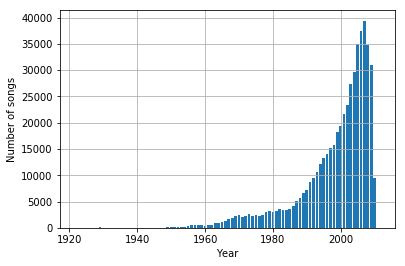

In [9]:
years = range(1922,2012)
values = [nsongs[y] for y in years]
plt.bar(years, values, align='center')
plt.xlabel("Year")
plt.ylabel("Number of songs")

/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


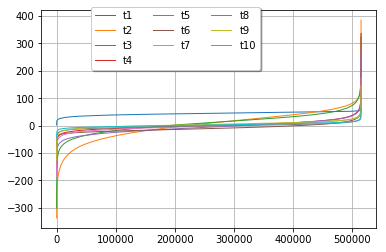

In [10]:
#Distribution of first 10 features
for t in features[1:11]:
    values = data[t].as_matrix()
    plt.plot(sorted(values), label=t, linewidth=1)

plt.legend(loc='upper center', bbox_to_anchor=(0.4, 1.04), ncol=3, fancybox=True, shadow=True)

In [11]:
#Most neural practiotioners suggest that for a more efficient neural-network we should normalize these values to the unit interval [0,1]
X = data.iloc[:,1:].as_matrix()  # this is the 90 columns without the year
Y = data.iloc[:,0].as_matrix()   # this is the year column

# data normalizations (scaling down all values to the interval [0,1])
# The years 1922-2011 are scaled down to integers [0,1,2,..., 89] 
a = X.min()
b = X.max()
X = (X - a) / (b - a)  # all values now between 0 and 1 !
Y = Y - Y.min()        # The years 1922-2011 are mapped to 0-89

# Training data set
X_train = X[0:463715]
y_train = Y[0:463715]

# Validation data set
X_test = X[463715:]
y_test = Y[463715:]

/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


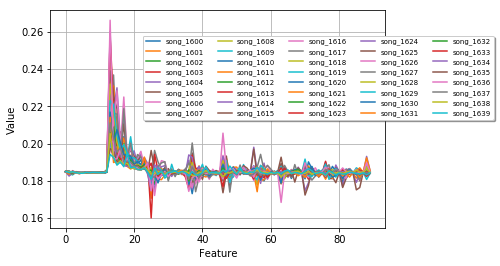

In [12]:
for i in range(1600, 1640):
    plt.plot(X_train[i], label='song_' + str(i))
    
plt.xlabel("Feature")
plt.ylabel("Value")
plt.legend(loc='upper center', bbox_to_anchor=(0.8, 0.9), ncol=5, fancybox=True, shadow=True, fontsize=7)

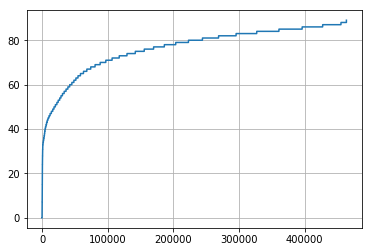

In [13]:
plt.plot(sorted(y_train))

In [14]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
#utils. to_categorical is used to convert 
#array of labeled data(from 0 to nb_classes-1) to one-hot vector. 

In [15]:
# Our first Keras Model
model1 = Sequential()
model1.add(Dense(90, input_shape=(90,)))
model1.add(Dense(90, init='uniform', activation='softmax'))

/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(90, activation="softmax", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [16]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
def show_scores(model, h):
    loss, acc = model.evaluate(X_train, Y_train, verbose=0)
    print("Training: accuracy   = %.6f loss = %.6f" % (acc, loss))
    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print("Validation: accuracy = %.6f loss = %.6f" % (acc, loss))
    print("Over fitting score   = %.6f" % over_fitting_score(h))
    print("Under fitting score  = %.6f" % under_fitting_score(h))
    view_acc(h)
    plt.show()
    view_loss(h)
    plt.show()

In [24]:
#fmon = FitMonitor(thresh=0.02, minacc=0.90, filename="model1.h5")

h = model1.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=20,
    verbose=0,
    validation_data=(X_test, Y_test),
    #callbacks = [fmon]
)

show_scores(model1, h)

Training: accuracy   = 0.988996 loss = 0.048575
Validation: accuracy = 0.988891 loss = 0.048522


NameError: global name 'over_fitting_score' is not defined

In [25]:
# Validating the accuracy and loss of our training set

loss, accuracy = model1.evaluate(X_train, Y_train, verbose=0)
print "Train: accuracy=%f loss=%f" % (accuracy, loss)

Train: accuracy=0.988996 loss=0.048575


In [26]:
# Validating the accuracy and loss of our testing set

loss, accuracy = model1.evaluate(X_test, Y_test, verbose=0)
print "Test: accuracy=%f loss=%f" % (accuracy, loss)

Test: accuracy=0.988891 loss=0.048522


In [27]:
# Second Keras Model
model2 = Sequential()
model2.add(Dense(180, input_shape=(90,)))
model2.add(Dropout(0.2))
model2.add(Dense(360, init='uniform', activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(360, init='uniform', activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(90, init='uniform', activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#fmon = FitMonitor(thresh=0.02, minacc=0.99, filename="model2.h5")
h = model2.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=10,
    verbose=0,
    validation_data=(X_test, Y_test),
    #callbacks = [fmon]
)

show_scores(model2, h)

/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(360, activation="relu", kernel_initializer="uniform")`
  """
/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(360, activation="relu", kernel_initializer="uniform")`
  import sys
/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(90, activation="sigmoid", kernel_initializer="uniform")`
  if __name__ == '__main__':
/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Training: accuracy   = 0.988996 loss = 0.048874
Validation: accuracy = 0.988891 loss = 0.048801


NameError: global name 'over_fitting_score' is not defined

In [ ]:
# Let's save our model just in case we'll need later for testing (or for post mortem analysis)
#model2.save('model2_final.h5')

In [28]:
P = model2.predict_classes(X_train)

In [29]:
Failed = []
for i in range(len(P)):
    if y_train[i] != P[i]:
        Failed.append(i)

In [30]:
loss = model2.evaluate(X_train, Y_train)

463715/463715 [==============================] - 21s 45us/step


In [ ]:
#Credits: https://samyzaf.com/ML/song_year/song_year.html